# Desci Token Network Distribution

The objective of this analysis is to determine the distribution of DESCI tokens across different L1 and L2 networks to provide actionable insights towards Bitcoin University's smart contract architecture design considerations. The JSON data `~/token-network-distribution/data/20251111.json` was manually collected from [CoinMarketCap](https://coinmarketcap.com/view/desci/) on November 12, 2025.

In [27]:
import pandas as pd
import os
import json

In [28]:
# change directory to the parent directory in python
# run this once
#os.chdir("../")
!pwd

/home/alice/git-repo/desci-analysis/token-network-distribution


In [30]:
# import data/20251111.json
with open("data/20251112.json", "r") as f:
    data = json.load(f)
print(data)

{'tokens': [{'name': 'OriginTrail', 'symbol': 'TRAC', 'contracts': [{'address': '0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f', 'network': 'ethereum'}, {'address': '0xeddd81e0792e764501aae206eb432399a0268db5', 'network': 'gnosis'}, {'address': '0xA81a52B4dda010896cDd386C7fBdc5CDc835ba23', 'network': 'base'}], 'wallets': ['metamask', 'binance', 'trust'], 'UCID': '2467', 'audits': ['quantstamp']}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'contracts': [{'address': '0xcb1592591996765ec0efc1f92599a19767ee5ffa', 'network': 'ethereum'}, {'address': 'bioJ9JTqW62MLz7UKHU69gtKhPpGi1BQhccj2kmSvUJ', 'network': 'solana'}, {'address': '0x226a2fa2556c48245e57cd1cba4c6c9e67077dd2', 'network': 'base'}], 'wallets': ['trust', 'solfare', 'backpack', 'phantom', 'binance', 'jupiter'], 'audits': [], 'UCID': '34812'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'contracts': [{'address': 'HNg5PYJmtqcmzXrv6S9zP1CDKk5BgDuyFBxbvNApump', 'network': 'solana'}], 'wallets': ['trust', 'solfare', 'backpack', 'phantom', '

In [10]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and network
# tokens can have multiple networks
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    #create row for each network
    name = token["name"]
    symbol = token["symbol"]
    for network in token["contracts"]:
        clean_data.append({"name": name, "symbol": symbol, "network": network["network"]})

print(clean_data[:10])
# convert list of dictionaries to dataframe
df = pd.DataFrame(clean_data)
df.head()


[{'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'ethereum'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'gnosis'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'base'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'ethereum'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'solana'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'base'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'network': 'solana'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'network': 'solana'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'ethereum'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'base'}]


,name,symbol,network
0,OriginTrail,TRAC,ethereum
1,OriginTrail,TRAC,gnosis
2,OriginTrail,TRAC,base
3,Bio Protocol,BIO,ethereum
4,Bio Protocol,BIO,solana


In [11]:
# the number of unique tokens
print("The number of unique tokens is: ", len(df["symbol"].unique()))

The number of unique tokens is:  31


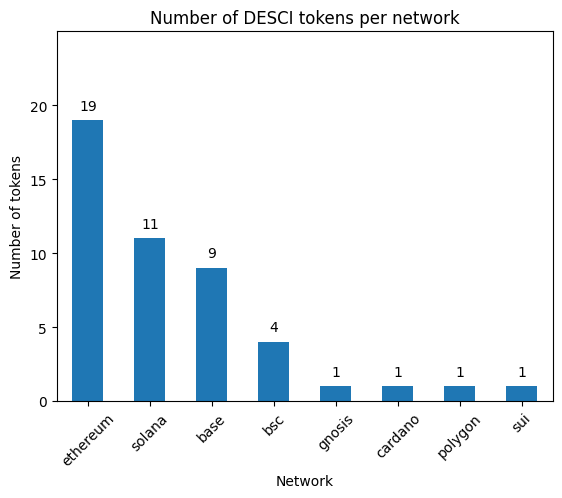

In [12]:
# create a bar chart of the number of tokens per network
import matplotlib.pyplot as plt
df["network"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 25)
# y axis labels every 5
plt.yticks(range(0, 25, 5))
# add annotation to the bars
for i, v in enumerate(df["network"].value_counts()):
    plt.text(i, v + 0.5, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per network")
plt.xlabel("Network")
plt.ylabel("Number of tokens")
plt.show()


# Desci Token Wallet Distribution

In [23]:
## create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and wallets
# tokens can have multiple wallets
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for wallet in token["wallets"]:
        clean_data.append({"name": name, "symbol": symbol, "wallet": wallet})

print(clean_data[:10])
# convert list of dictionaries to dataframe
df2 = pd.DataFrame(clean_data)
df2.head()

#which token has multiple trust wallets?
df2[df2["wallet"] == "trust"].groupby("name").size().reset_index(name="count")



[{'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'metamask'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'binance'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'trust'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'trust'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'solfare'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'backpack'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'phantom'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'binance'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'jupiter'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'wallet': 'trust'}]


,name,count
0,Aimedis (new),1
1,Alchemist AI,1
2,AxonDAO Governance Token,1
3,Bio Protocol,1
4,Cerebrum DAO,1
5,Data Lake,1
6,DeSci AI Agent,1
7,DeSci Meme,1
8,Dynex,1
9,Galeon,1


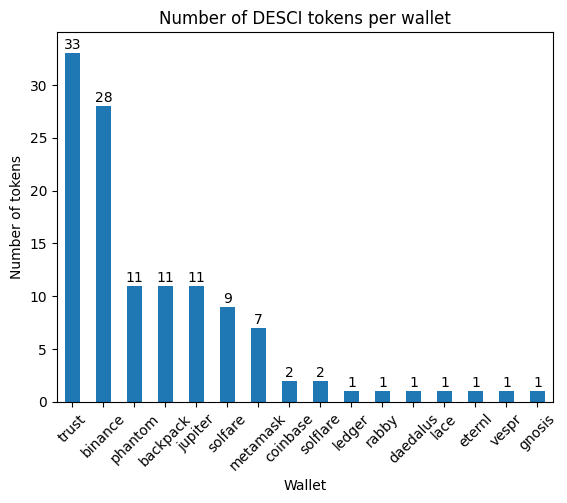

In [24]:
# create a bar chart of the number of tokens per wallet
import matplotlib.pyplot as plt
df2["wallet"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 35)
# y axis labels every 5
plt.yticks(range(0, 35, 5))
# add annotation to the bars
for i, v in enumerate(df["wallet"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per wallet")
plt.xlabel("Wallet")
plt.ylabel("Number of tokens")
plt.show()


# DeSci Audit Distribution

In [32]:
## create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and audits
# tokens can have multiple audits
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for audit in token["audits"]:
        clean_data.append({"name": name, "symbol": symbol, "audit": audit})
    if len(token["audits"]) < 1:
        clean_data.append({"name": name, "symbol": symbol, "audit": "none"})
print(clean_data[:10])
# convert list of dictionaries to dataframe
df3 = pd.DataFrame(clean_data)
df3.head()

#which tokens has multiple trust wallets?
#df3[df3["wallet"] == "trust"].groupby("name").size().reset_index(name="count")



[{'name': 'OriginTrail', 'symbol': 'TRAC', 'audit': 'quantstamp'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'audit': 'none'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'audit': 'none'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'audit': 'certik'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'audit': 'none'}, {'name': 'Galeon', 'symbol': 'GALEON', 'audit': 'certik'}, {'name': 'Dynex', 'symbol': 'DNX', 'audit': 'cyberscope'}, {'name': 'ValleyDAO', 'symbol': 'GROW', 'audit': 'none'}, {'name': 'Rifampicin', 'symbol': 'RIF', 'audit': 'none'}, {'name': 'Rejuve.AI', 'symbol': 'RJV', 'audit': 'hacken'}]


,name,symbol,audit
0,OriginTrail,TRAC,quantstamp
1,Bio Protocol,BIO,none
2,Alchemist AI,ALCH,none
3,Pythia,PYTHIA,certik
4,ResearchCoin,RSC,none


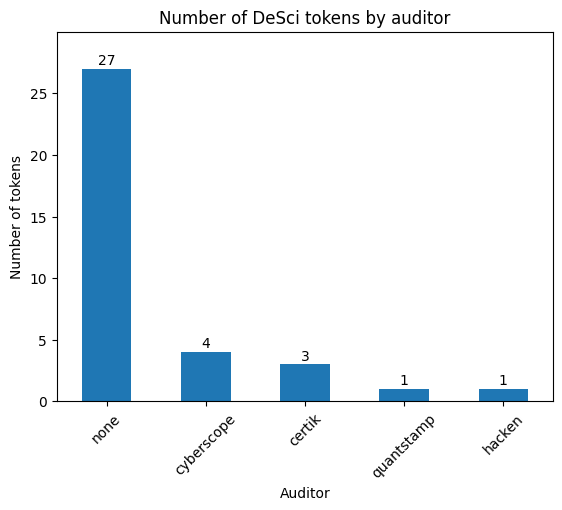

In [35]:
# create a bar chart of the number of tokens per audit
import matplotlib.pyplot as plt
df3["audit"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 30)
# y axis labels every 5
plt.yticks(range(0, 30, 5))
# add annotation to the bars
for i, v in enumerate(df3["audit"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DeSci tokens by auditor")
plt.xlabel("Auditor")
plt.ylabel("Number of tokens")
plt.show()
